In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [62]:
import pandas as pd

In [3]:
pinkwink_web = pd.read_csv('08. PinkWink Web Traffic.csv', encoding='utf-8',
                           thousands=',', # 쉼표제거
                           names=['date', 'hit'],
                          index_col=0) # names[0]

In [4]:
pinkwink_web

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0
...,...
17. 6. 27.,1436.0
17. 6. 28.,1387.0
17. 6. 29.,1328.0


In [5]:
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]

시계열 데이터 분석시 주의점
1. 원 데이터의 안정성을 판단
2. 안정된 형태로 변환
3. 예측 모델의 선정 및 검증
   => 개발자의 몫
   
fbprophet 모듈 : 페이스북에서 개발 배포한 모듈
    선행작업 : pip install pystan  /  pip install prophet
    conda install -c conda-forge fbprophet

In [63]:
import warnings

In [64]:
warnings.filterwarnings('ignore')

In [65]:
import numpy as np

In [66]:
import matplotlib.pyplot as plt

In [67]:
from datetime import datetime

In [68]:
import pandas_datareader.data as web

In [69]:
from fbprophet import Prophet

<AxesSubplot:xlabel='date'>

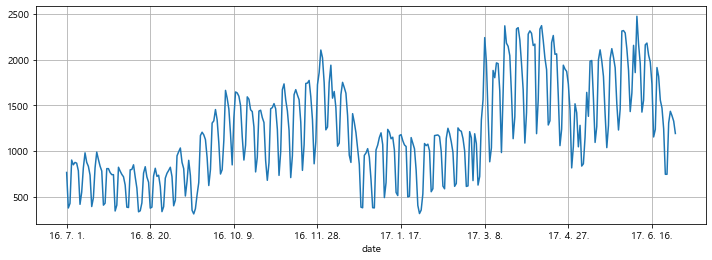

In [13]:
# numpy의 polyfit을 이용하여 회귀분석

pinkwink_web['hit'].plot(figsize=(12,4), grid=True)

In [16]:
# 주기성 파악 ( 좀 더 정확한 )

# 시간축 설정
time = np.arange(0, len(pinkwink_web)) # 365개
print(time)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [17]:
# 웹 트래픽 데이터 추출('hit')
traffic = pinkwink_web['hit'].values
traffic

array([ 766.,  377.,  427.,  902.,  850.,  876.,  868.,  785.,  417.,
        550.,  818.,  981.,  877.,  833.,  737.,  393.,  489.,  817.,
        989.,  908.,  835.,  782.,  408.,  429.,  808.,  808.,  765.,
        742.,  742.,  344.,  408.,  823.,  781.,  745.,  719.,  629.,
        386.,  382.,  795.,  799.,  850.,  717.,  595.,  335.,  346.,
        433.,  759.,  829.,  716.,  659.,  375.,  386.,  727.,  812.,
        723.,  736.,  613.,  337.,  391.,  704.,  757.,  788.,  823.,
        721.,  401.,  463.,  948.,  993., 1034.,  877.,  808.,  508.,
        669.,  899.,  732.,  352.,  312.,  369.,  522.,  655., 1170.,
       1207., 1178., 1126.,  929.,  623.,  799., 1307., 1331., 1455.,
       1342., 1090.,  749.,  797., 1117., 1665., 1579., 1461., 1188.,
        849., 1364., 1648., 1637., 1601., 1499., 1159.,  902., 1066.,
       1594., 1568., 1453., 1433., 1265.,  772.,  932., 1439., 1448.,
       1367., 1313.,  895.,  680.,  872., 1464., 1476., 1520., 1464.,
       1239.,  734.,

In [18]:
# 현재 추출된 데이터를 이용하여 간단한 모델 작성
# 회귀분석 사용
# 1차, 2차, 3차 ... 15차 다항식으로 표현하고 그 결과를 확인
# np.linspace(시작, 끝, 총개수) : 배열
fx = np.linspace(0, time[-1], 1000)
fx

array([  0.        ,   0.36436436,   0.72872873,   1.09309309,
         1.45745746,   1.82182182,   2.18618619,   2.55055055,
         2.91491491,   3.27927928,   3.64364364,   4.00800801,
         4.37237237,   4.73673674,   5.1011011 ,   5.46546547,
         5.82982983,   6.19419419,   6.55855856,   6.92292292,
         7.28728729,   7.65165165,   8.01601602,   8.38038038,
         8.74474474,   9.10910911,   9.47347347,   9.83783784,
        10.2022022 ,  10.56656657,  10.93093093,  11.2952953 ,
        11.65965966,  12.02402402,  12.38838839,  12.75275275,
        13.11711712,  13.48148148,  13.84584585,  14.21021021,
        14.57457457,  14.93893894,  15.3033033 ,  15.66766767,
        16.03203203,  16.3963964 ,  16.76076076,  17.12512513,
        17.48948949,  17.85385385,  18.21821822,  18.58258258,
        18.94694695,  19.31131131,  19.67567568,  20.04004004,
        20.4044044 ,  20.76876877,  21.13313313,  21.4974975 ,
        21.86186186,  22.22622623,  22.59059059,  22.95

In [19]:
# 사용자 정의 함수
def error(f, x, y):
    return np.sqrt(np.mean(f(x)-y)**2)

In [20]:
# 1차 회귀
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

In [32]:
# 2차 회귀
fp2 = np.polyfit(time, traffic, 2)
f2 = np.poly1d(fp2)

# 3차 회귀
fp3 = np.polyfit(time, traffic, 3)
f3 = np.poly1d(fp3)

# 15차 회귀
fp15 = np.polyfit(time, traffic, 15)
f15 = np.poly1d(fp15)

# 30차 회귀
fp30 = np.polyfit(time, traffic, 30)
f30 = np.poly1d(fp30)


In [33]:
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))
print(error(f30, time, traffic))

3.687814133216257e-13
4.086496742212609e-13
2.691107610725377e-13
6.318839484253022e-06
0.000642576857706457


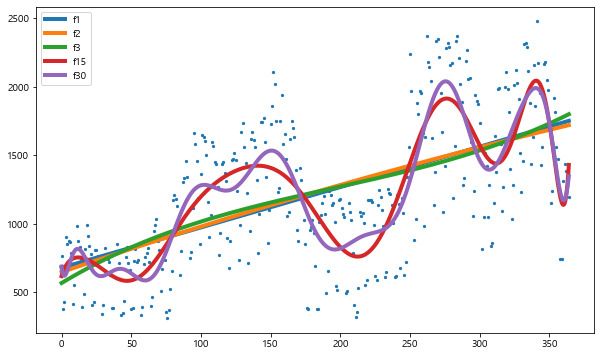

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s = 5)
plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')
plt.plot(fx, f30(fx), lw=4, label='f30')
plt.legend(loc=2)
plt.show()

In [ ]:
# 1, 2, 3차는 별 차이 없음
# 15, 30 차는 과적합일 가능성이 높음

In [37]:
# prophet 모듈을 이용한 forecast

# 예측을 위한 데이터 작업
# 1. 데이터프레임에서 날짜(index), 방문수(hit) 추출
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.head()

,ds,y
date,,
16. 7. 1.,16. 7. 1.,766.0
16. 7. 2.,16. 7. 2.,377.0
16. 7. 3.,16. 7. 3.,427.0
16. 7. 4.,16. 7. 4.,902.0
16. 7. 5.,16. 7. 5.,850.0


In [38]:
# index 초기화
df.reset_index(inplace=True)

In [39]:
df.head()

,date,ds,y
0,16. 7. 1.,16. 7. 1.,766.0
1,16. 7. 2.,16. 7. 2.,377.0
2,16. 7. 3.,16. 7. 3.,427.0
3,16. 7. 4.,16. 7. 4.,902.0
4,16. 7. 5.,16. 7. 5.,850.0


In [42]:
# datetime()이용하여 날짜 형식으로 변환
df['ds'] = pd.to_datetime(df['ds'], format = '%y. %m. %d.')

In [43]:
df.head()

,date,ds,y
0,16. 7. 1.,2016-07-01,766.0
1,16. 7. 2.,2016-07-02,377.0
2,16. 7. 3.,2016-07-03,427.0
3,16. 7. 4.,2016-07-04,902.0
4,16. 7. 5.,2016-07-05,850.0


In [44]:
del df['date']
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [45]:
# prophet을 사용할 경우 주기성이 있다고 설정
# 연단위로 주기성이 있다는 가정

m = Prophet(yearly_seasonality=True, daily_seasonality=True)

In [46]:
m.fit(df)

In [48]:
# 60일 간의 데이터만 예측

future = m.make_future_dataframe(periods=60)

In [49]:
future.head()

,ds
0,2016-07-01
1,2016-07-02
2,2016-07-03
3,2016-07-04
4,2016-07-05


In [50]:
# 예측한 데이터 저장

forecast = m.predict(future)

In [51]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-07-01,825.908758,521.981192,963.223241,825.908758,825.908758,-89.203321,-89.203321,-89.203321,241.465995,...,-51.503692,-51.503692,-51.503692,-279.165624,-279.165624,-279.165624,0.0,0.0,0.0,736.705437
1,2016-07-02,826.717037,94.730933,523.315873,826.717037,826.717037,-521.745203,-521.745203,-521.745203,241.465995,...,-467.504111,-467.504111,-467.504111,-295.707087,-295.707087,-295.707087,0.0,0.0,0.0,304.971834
2,2016-07-03,827.525316,210.179474,635.600108,827.525316,827.525316,-403.033522,-403.033522,-403.033522,241.465995,...,-335.342351,-335.342351,-335.342351,-309.157166,-309.157166,-309.157166,0.0,0.0,0.0,424.491793
3,2016-07-04,828.333595,766.082591,1183.086043,828.333595,828.333595,139.019272,139.019272,139.019272,241.465995,...,217.283657,217.283657,217.283657,-319.730380,-319.730380,-319.730380,0.0,0.0,0.0,967.352866
4,2016-07-05,829.141874,769.776217,1206.665876,829.141874,829.141874,167.238924,167.238924,167.238924,241.465995,...,253.456750,253.456750,253.456750,-327.683821,-327.683821,-327.683821,0.0,0.0,0.0,996.380798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2017-08-25,1166.464680,678.928046,1102.940140,1166.451426,1166.478268,-269.888108,-269.888108,-269.888108,241.465995,...,-51.503692,-51.503692,-51.503692,-459.850411,-459.850411,-459.850411,0.0,0.0,0.0,896.576571
421,2017-08-26,1167.276383,289.085099,688.553010,1167.262778,1167.290384,-685.731971,-685.731971,-685.731971,241.465995,...,-467.504111,-467.504111,-467.504111,-459.693855,-459.693855,-459.693855,0.0,0.0,0.0,481.544412
422,2017-08-27,1168.088087,412.395955,821.719294,1168.074026,1168.102510,-553.876086,-553.876086,-553.876086,241.465995,...,-335.342351,-335.342351,-335.342351,-459.999730,-459.999730,-459.999730,0.0,0.0,0.0,614.212001
423,2017-08-28,1168.899790,954.916832,1363.495690,1168.885351,1168.914551,-1.933583,-1.933583,-1.933583,241.465995,...,217.283657,217.283657,217.283657,-460.683235,-460.683235,-460.683235,0.0,0.0,0.0,1166.966207


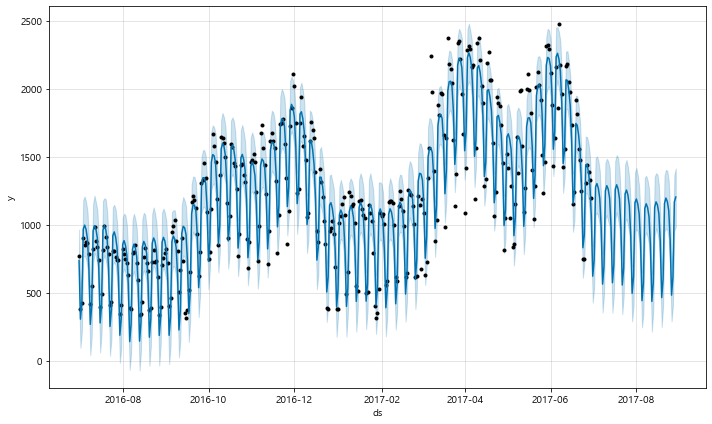

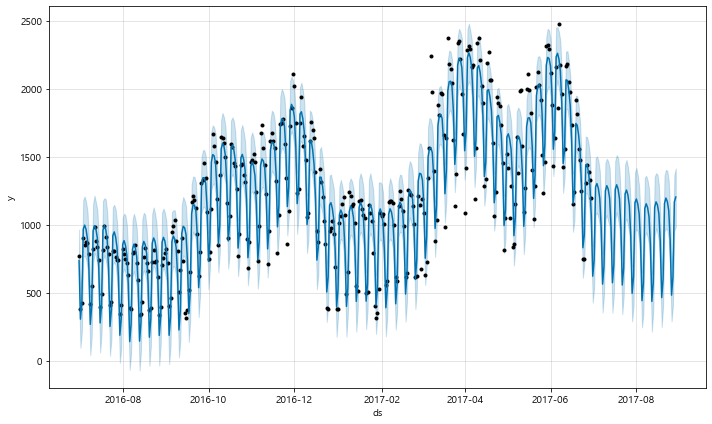

In [52]:
# 시각화

m.plot(forecast)

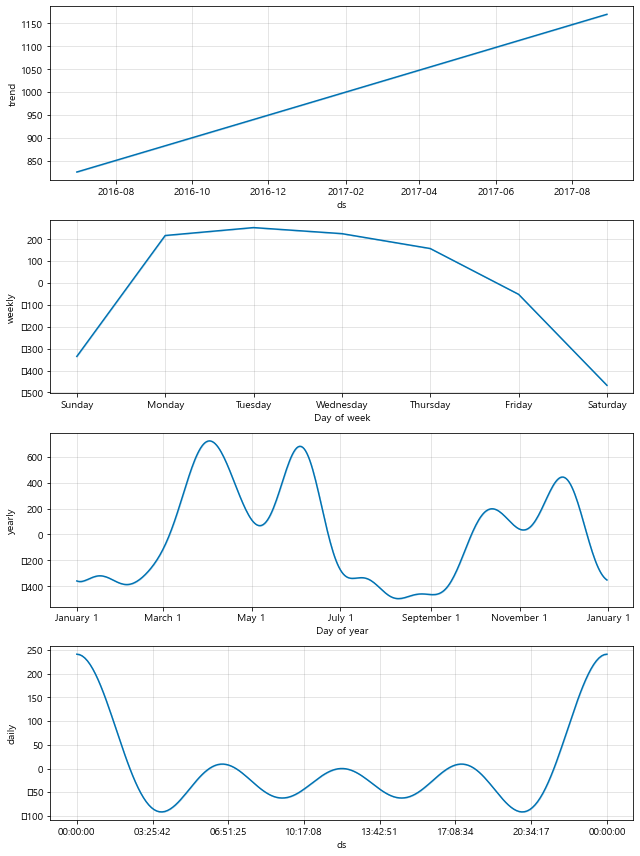

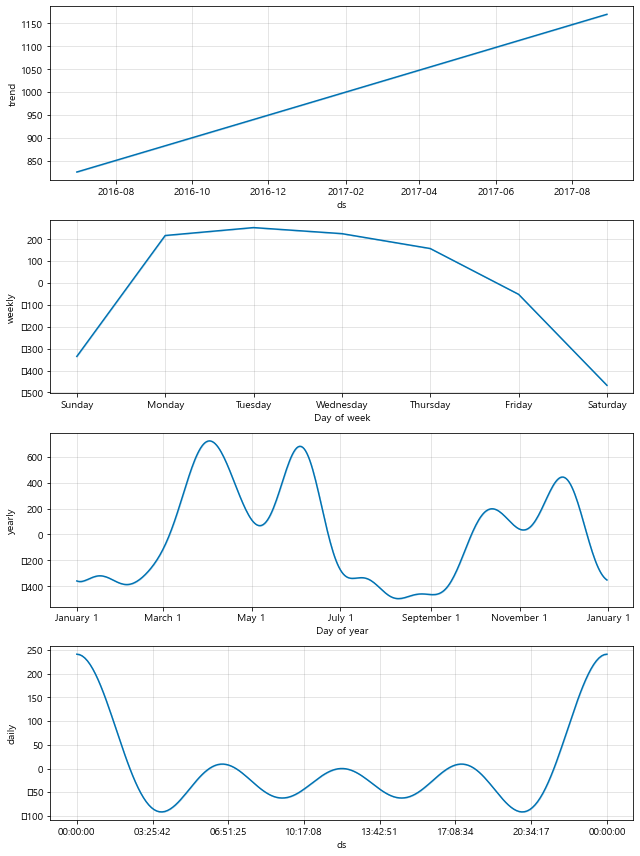

In [53]:
m.plot_components(forecast)

In [54]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

In [59]:
# 야후 증권 사이트에 접속하여 특정 종목 데이터를 이용하여
# 시계열 분석 : Seasonal 시계열 분석
from pandas_datareader import data
import yfinance as yf
# => pip install yfinance

In [60]:
yf.pdr_override()

start_date = '1900-1-1'
end_date = '2017-6-30'

# 증권데이터 사용
# 1. 종목코드 : KIA 000270.KS

KIA = data.get_data_yahoo('000270.KS', start_date, end_date)

Exception in thread Thread-9:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\admin\anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\yfinance\multi.py", line 169, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "C:\Users\admin\anaconda3\lib\site-packages\yfinance\multi.py", line 181, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "C:\Users\admin\anaconda3\lib\site-packages\yfinance\base.py", line 139, in history
    start = int(_time.mktime(
OverflowError: mktime argument out of range


KeyboardInterrupt: 

In [ ]:
KIA

In [ ]:
KIA['Close'].plot(figsize=(12,6), grid=True)

In [ ]:
KIA_trunc = KIA[:,'2016-12-31']
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
m.plot_components(forecast)

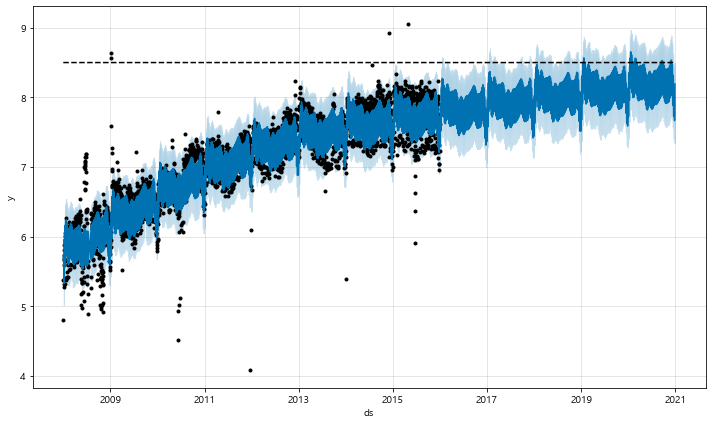

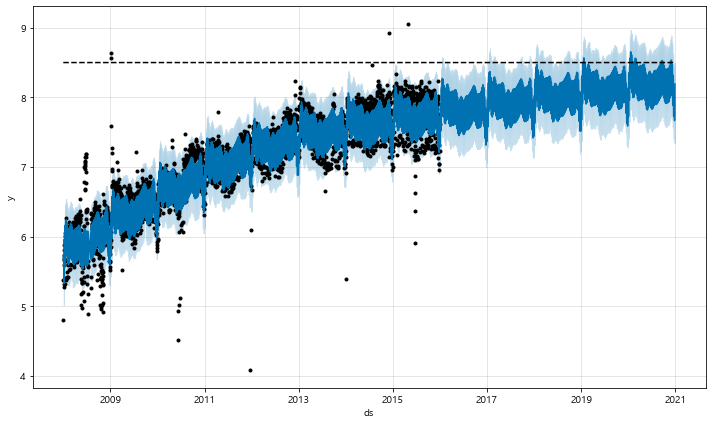

In [71]:
# growth model
df = pd.read_csv('08. example_wp_R.csv')
df['y'] = np.log(df['y'])
df['cap'] = 8.5

m = Prophet(growth = 'logistic', daily_seasonality=True)
m.fit(df)

# 1 model
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst)